# 0001 - Linear Regression Model

# I. Abstract
This notebook is all about create a linear regression model.
- First part, setup a random equation y=a.x + b and detach it's outputs
- Second part, setup model and trying to figure it own weight and bias.

# II. Setup data for training.

In [97]:
import torch
import torch.nn as nn

In [98]:
class DefinedLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = torch.tensor(1.5, requires_grad=False)
        self.bias = torch.tensor(2.75, requires_grad=False)
        
    def forward(self, input):
        output = self.weight * input + self.bias
        return output

In [99]:
x_input_list = torch.linspace(start=0, end=100, steps=3000)
#print(f"x_input_list: {x_input_list}")

In [100]:
definedLinearRegressionModel = DefinedLinearRegressionModel()

In [101]:
y_output_list = definedLinearRegressionModel(x_input_list)

In [102]:
input_length = list(x_input_list.size())[0]
y_output_noise_list = torch.randint(low=-30,high=30, size=(input_length,)) + y_output_list

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Linear Regression Dataset')

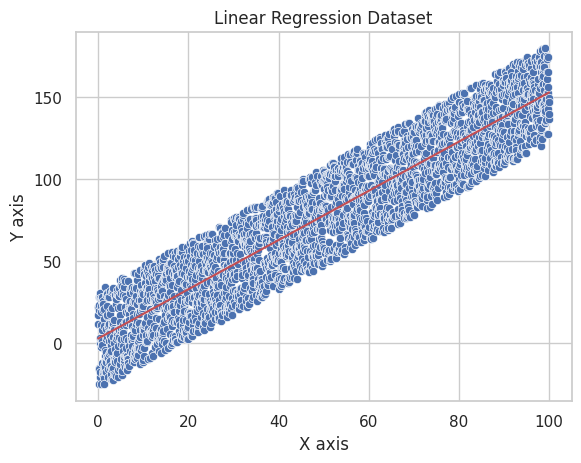

In [104]:
sns.set(style='whitegrid')
sns.lineplot(x=x_input_list, y= y_output_list, color='r')
sns.scatterplot(x=x_input_list, y=y_output_noise_list)
plt.ylabel("Y axis")
plt.xlabel("X axis")
plt.title("Linear Regression Dataset")

# III. Setup an empty model for training

In [330]:
class TrainModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.tensor(-3.0, requires_grad=True))
        self.bias = nn.Parameter(torch.tensor(5.0, requires_grad=True))
    
    def forward(self, input):
        output = self.weight * input + self.bias
        return output

In [331]:
train_model = TrainModel()

In [332]:
from torch.optim import SGD

In [333]:
#optimizer = SGD(params = train_model.parameters(), lr=0.0000001)

In [334]:
optimizer = torch.optim.Adam(params = train_model.parameters(), lr=0.01)

In [335]:
print(f"Epoch -1: Linear Regression: y={train_model.weight.data}.x + {train_model.bias.data}")

Epoch -1: Linear Regression: y=-3.0.x + 5.0


In [336]:
def add_prefix_zero(number, zero_count):
    return "{0:0{1}d}".format(number, zero_count)

In [337]:
def draw_plot(model, epoch="Unknown"):
    plt.clf()
    sns.set(style='whitegrid')
    sns.lineplot(x=x_input_list, y= model(x_input_list).detach(), color='r')
    sns.scatterplot(x=x_input_list, y=y_output_noise_list)
    plt.ylabel("Y axis")
    plt.xlabel("X axis")
    plt.title(f"Epoch {epoch}")

In [338]:
def save_plot(model, epoch):
    plt.clf()
    sns.set(style='whitegrid')
    sns.lineplot(x=x_input_list, y= model(x_input_list).detach(), color='r')
    sns.scatterplot(x=x_input_list, y=y_output_noise_list)
    plt.ylabel("Y axis")
    plt.xlabel("X axis")
    plt.title(f"Epoch {epoch}")
    
    file_name = f"model_{add_prefix_zero(epoch, 4)}.png"
    plt.savefig(f"../images/0001/{file_name}")

In [339]:
global_current_epoch = 0
best_avg_total_loss = float('inf')

After Epoch 3009, avg_total_loss: 8.307087676531363

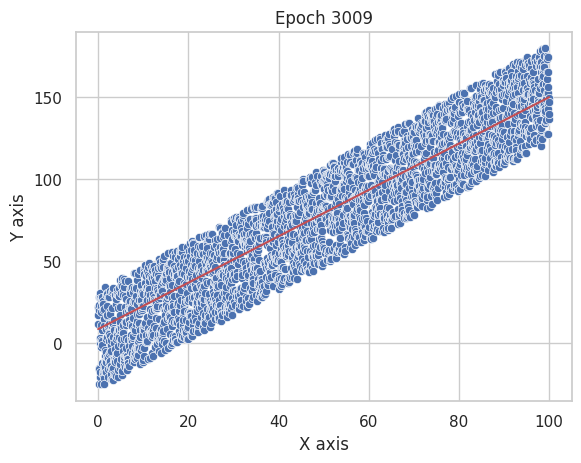

In [347]:
number_of_epoch = 1000
for epoch in range(number_of_epoch):
    avg_total_loss = 0.0
    total_loss = 0.0
    for i in range(len(x_input_list)):
        input = x_input_list[i]
        real_output = y_output_list[i]
        
        model_output = train_model(input)
        loss = (model_output - real_output) ** 2
        loss.backward()
        total_loss = total_loss + float(loss)
    
    avg_total_loss = total_loss / len(x_input_list)
    
    print(f"\rAfter Epoch {global_current_epoch}, avg_total_loss: {avg_total_loss}", end="")
    
    if avg_total_loss < best_avg_total_loss:
        best_avg_total_loss = avg_total_loss
        optimizer.step()
        optimizer.zero_grad()
        save_plot(train_model, global_current_epoch)
        global_current_epoch = global_current_epoch + 1
    else:
        print("")
        print(f"After Epoch {global_current_epoch}, avg_total_loss: {avg_total_loss} greater than the best_avg_total_loss {best_avg_total_loss}.")
        print(f"After Epoch {global_current_epoch}, Linear Regression: y={train_model.weight.data}.x + {train_model.bias.data}")
        print("Stop Training.")
        break;

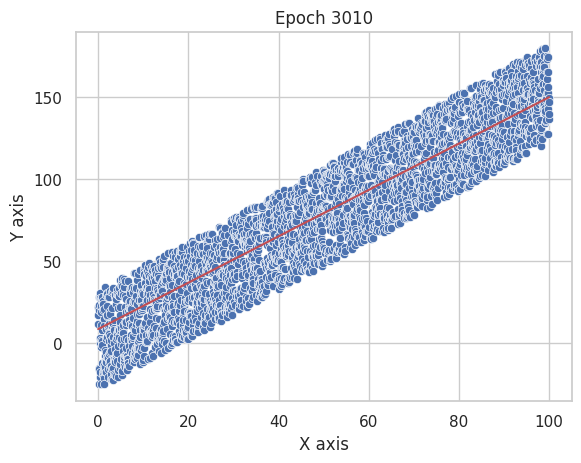

In [348]:
draw_plot(train_model, global_current_epoch)

In [349]:
print(f"Epoch {global_current_epoch}: Linear Regression: y={train_model.weight.data}.x + {train_model.bias.data}")

Epoch 3010: Linear Regression: y=1.4131513833999634.x + 8.51213264465332
